In [1]:
import matplotlib.pyplot as plt
import numpy as np
image = plt.imread('paysage.jpeg')
# image = plt.imread('oiseau.jpeg')

In [2]:
h,w,n =np.shape(image)
print(h,w,n)

899 1600 3


In [3]:
image[0][0]

array([ 78, 156, 238], dtype=uint8)

In [4]:
print(image[1,1])

[ 78 156 238]


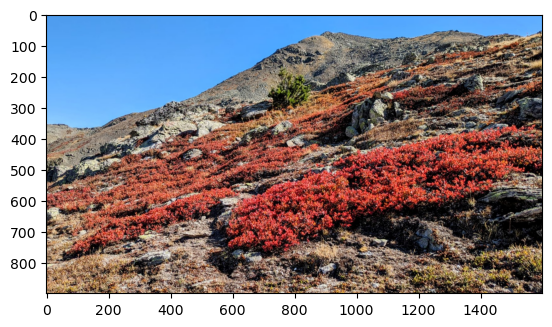

In [5]:
plt.figure(1)
plt.imshow(image)
plt.show()

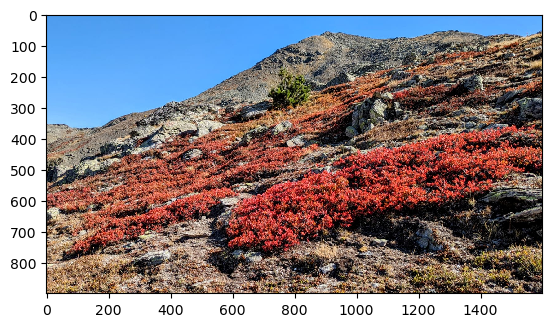

In [6]:
plt.imshow(image,interpolation='none')
plt.show()

In [7]:

def inverser_v1(image):
    lacopie = np.copy(image)
    h, w, n = np.shape(image)
    for i in range(h):
        for j in range(w):
            for k in range(3):
                lacopie[i, j, k] = 255 -image[i, j, k]
    return lacopie

def inverser_v2(image):
    lacopie = 255 - image
    return lacopie

In [8]:
import time
tps1 = time.time()
im1_inverse = inverser_v1(image)
tps2 = time.time()
im2_inverse = inverser_v2(image)
tps3 = time.time()
print('durée avec v1',(tps2 - tps1))
print('durée avec v2',(tps3 - tps2))

durée avec v1 7.8673319816589355
durée avec v2 0.0010895729064941406


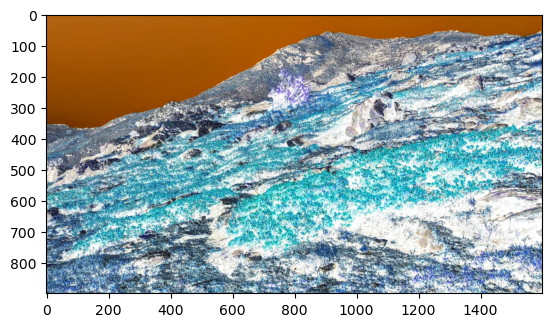

In [9]:
plt.imshow(im2_inverse)
plt.show()

In [10]:
def filtrer_RVB(image, composante):
    if composante == 'R':
        copie = image * [1,0,0]
    elif composante == 'V':
        copie = image * [0,1,0]
    elif composante == 'B':
        copie = image * [0,0,1]
    else:
        print('Composante non conforme')
        return image
    return copie

In [11]:
image_R = filtrer_RVB(image,'R')


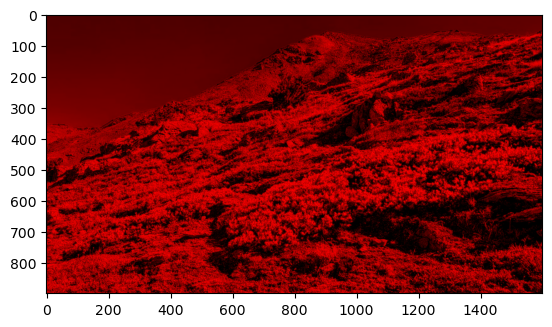

In [12]:
plt.imshow(image_R)
plt.show()

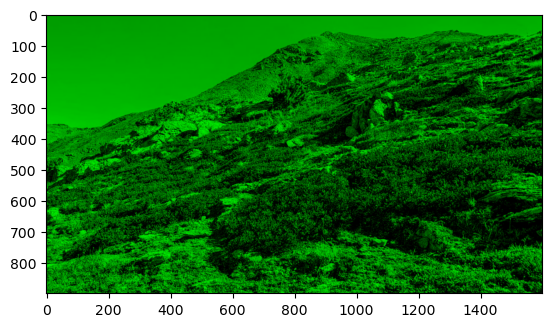

In [13]:
plt.imshow(filtrer_RVB(image,'V'))
plt.show()

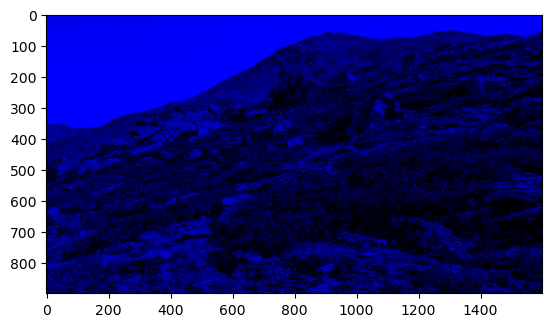

In [14]:
plt.imshow(filtrer_RVB(image,'B'))
plt.show()

In [15]:
def gris_brut(image):
    haut , larg, nbcoul = np.shape(image)
    lacopie = np.copy(image)
    for i in range(haut):
        for j in range(larg):
            moyenne = int(sum(image[i,j])/3) # valeur moyenne arrondie à un entier !
            lacopie[i,j,:] = moyenne  # affectation des trois valeurs [R,V,B]
    return lacopie

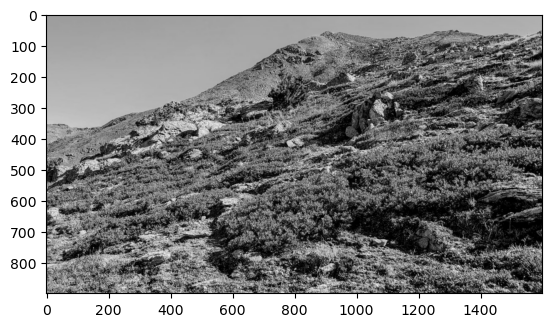

In [16]:
plt.imshow(gris_brut(image))
plt.show()

In [17]:
def gris_pondere(image):
    haut , larg, nbcoul = np.shape(image)
    lacopie = np.copy(image)
    for i in range(haut):
        for j in range(larg):
            # moyenne = int(0.3*image[i,j][0] + 0.6*image[i,j][1] + 0.1*image[i,j][2] ) # valeur moyenne arrondie à un entier !
            # moyenne = int(sum( image[i,j]*[0.3,0.6,0.1])) # valeur moyenne arrondie à un entier !
            moyenne = int(np.dot(image[i,j],[0.3,0.6,0.1])) # valeur moyenne arrondie à un entier !
            lacopie[i,j,:] = moyenne  # affectation des trois valeurs [R,V,B]
    return lacopie

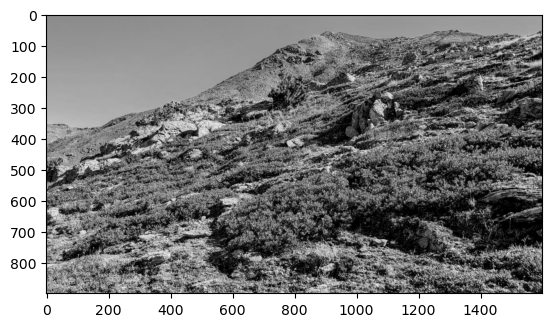

In [18]:
plt.imshow(gris_pondere(image))
plt.show()

In [19]:
def noir_et_blanc(image, seuil):
    lacopie = np.copy(image)
    haut , larg, nbcoul = np.shape(image)
    for i in range(haut):
        for j in range(larg):
            moyenne = int(np.dot(image[i,j],[0.3,0.6,0.1]))
            lacopie[i,j,:] = 0 if moyenne<seuil else 255
    return lacopie
    

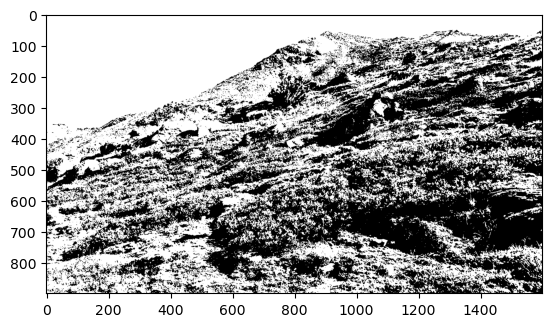

In [20]:
plt.imshow(noir_et_blanc(image, 100))
plt.show()

In [21]:
def negatif_sur_diagonale(image):
    lacopie = np.copy(image)
    haut , larg, nbcoul = np.shape(image)
    for i in range(haut):
        for j in range(int(larg*(1 - i/haut))):
            lacopie[i,j,:]= 255 - lacopie[i,j,:]
    return lacopie

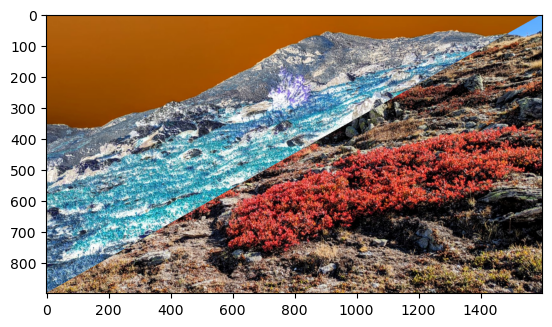

In [22]:
plt.imshow(negatif_sur_diagonale(image))
plt.show()

In [23]:
def gris_hors_rectangle(image, h1, w1, h2, w2):
    lacopie = np.copy(image)
    haut , larg, nbcoul = np.shape(image)
    for i in range(haut):
        for j in range(larg):
            if not (i >h1 and i<h2 and j>w1 and j<w2):
                moyenne = int(np.dot(image[i,j],[0.3,0.6,0.1]))
                lacopie[i,j,:] = 0 if moyenne<150 else 255
    return lacopie

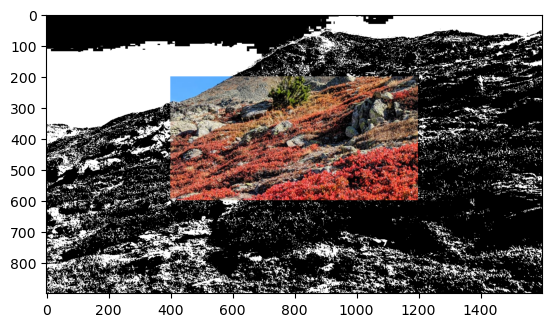

In [24]:
plt.imshow(gris_hors_rectangle(image, 200,400,600,1200))
plt.show()

In [25]:
from math import sqrt
def gris_hors_cercle(image, hc, wc, rc):
    lacopie = np.copy(image)
    haut , larg, nbcoul = np.shape(image)
    for i in range(haut):
        for j in range(larg):
            d = sqrt((i-hc)**2 + (j-wc)**2)
            if d > rc:
                moyenne = int(np.dot(image[i,j],[0.3,0.6,0.1]))
                lacopie[i,j,:] = 0 if moyenne<120 else 255
    return lacopie

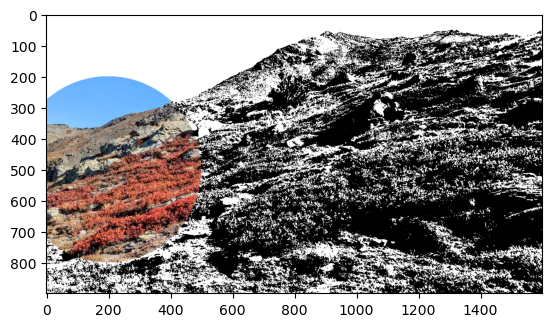

In [26]:
plt.imshow(gris_hors_cercle(image, 500,200,300))
plt.show()

In [27]:
def miroir_gauche_droite(image):
    lacopie = np.copy(image)
    haut , larg, nbcoul = np.shape(image)
    for i in range(haut):
        for j in range(int(larg/2)):
            lacopie[i,int(larg/2)+j] = lacopie[i,int(larg/2) -j]
    return lacopie

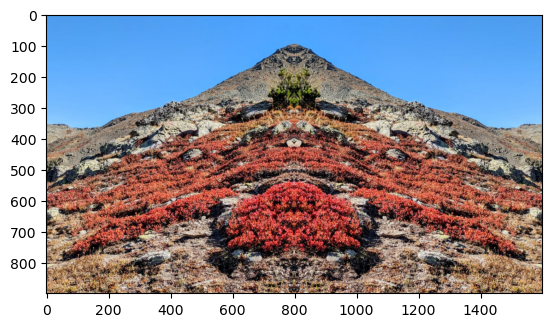

In [28]:
plt.imshow(miroir_gauche_droite(image))
plt.show()

In [29]:
def miroir_droite_gauche(image):
    lacopie = np.copy(image)
    haut , larg, nbcoul = np.shape(image)
    for i in range(haut):
        for j in range(int(larg/2)):
            lacopie[i,j] = lacopie[i,larg-1 -j]
    return lacopie

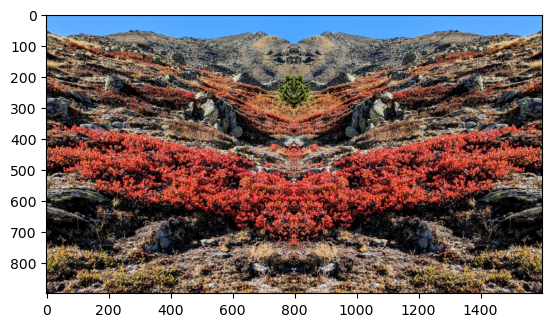

In [30]:
plt.imshow(miroir_droite_gauche(image))
plt.show()

In [31]:
def pivoter(image, sens=1):
    
    hauteur , largeur, nbcouleurs = np.shape(image)
    lacopie = np.zeros(hauteur*largeur*nbcouleurs).reshape(largeur, hauteur,nbcouleurs).astype(np.uint8)
    for i in range(largeur):
        for j in range(hauteur):
            if sens == 1:
                lacopie[i,j] = image[j,largeur -i -1]
            else:
                lacopie[i,j] = image[hauteur-j-1,i]
    return lacopie

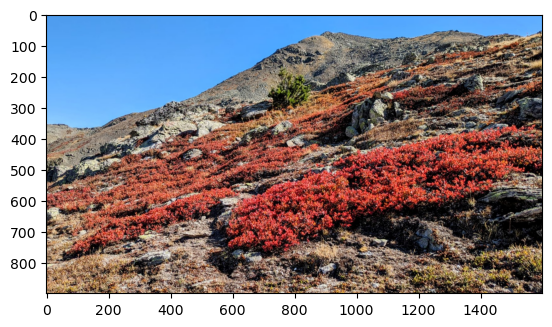

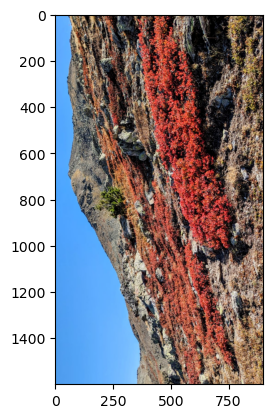

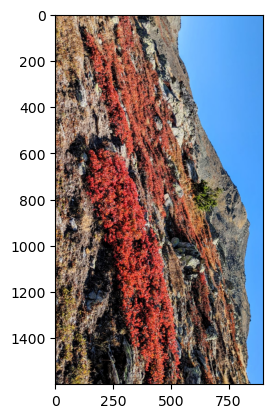

In [32]:
plt.imshow(image)
plt.show()
plt.imshow(pivoter(image))
plt.show()
plt.imshow(pivoter(image,-1))
plt.show()

In [33]:
def pixellisation(image,n):
    hauteur , largeur, nbcouleurs = np.shape(image)
    lacopie = np.zeros(int(hauteur/n)*int(largeur/n)*nbcouleurs).reshape(int(hauteur/n), int(largeur/n),nbcouleurs).astype(np.uint8)
    for i in range(int(hauteur/n)):
        for j in range(int(largeur/n)):
           lacopie[i,j] = (np.sum(np.sum(image[1+n*i:n+n*i ,1+n*j:n+n*j],axis=0),axis=0)/(n*n)).astype(int)
    return lacopie

In [34]:
print(image[501:504,501:504])
print((np.sum(np.sum(image[501:504,501:504],axis=0),axis=0)/9).astype(int))

[[[158 118 108]
  [184 124 114]
  [206 133 124]]

 [[196 159 151]
  [204 147 140]
  [209 141 132]]

 [[230 189 183]
  [235 178 171]
  [229 162 154]]]
[205 150 141]


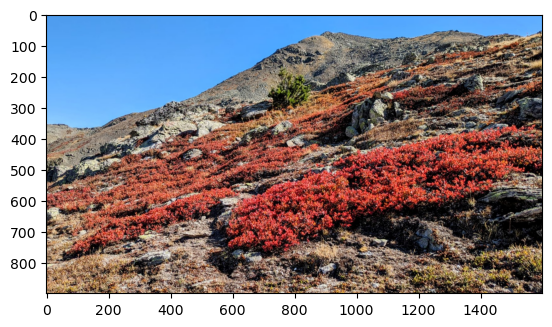

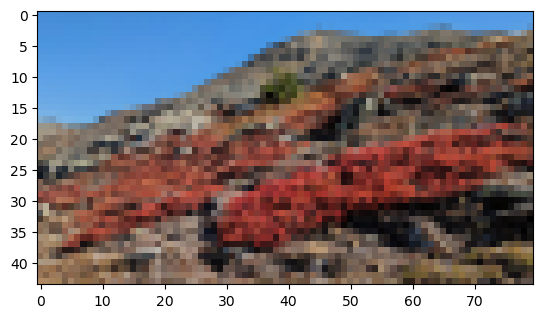

In [35]:
plt.imshow(image)
plt.show()
plt.imshow(pixellisation(image,20))
plt.show()

In [36]:
from math import sqrt
import cv2 as cv
def detection_contour(image,seuil):
    copiegrise = gris_pondere(image)
    lacopie = np.ones((np.shape(image)),dtype = np.uint8) * 255
    haut , larg, nbcoul = np.shape(image)
    for i in range(1,haut-1):
        for j in range(1,larg-1):
            if(np.sqrt(cv.add(cv.absdiff(copiegrise[i-1,j], copiegrise[i+1,j])**2 , cv.absdiff(copiegrise[i,j-1], copiegrise[i,j+1])**2)[0]) > seuil):
                lacopie[i,j] =[0,0,0]
            else:
                lacopie[i,j] =[255,255,255]
    return lacopie

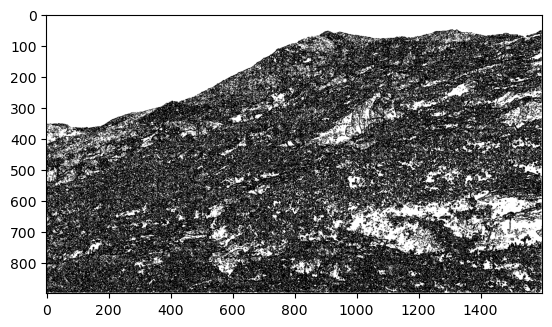

In [37]:
plt.imshow(detection_contour(image,30))
plt.show()

In [113]:
from math import floor
def histogramme(image):
    H = np.zeros((4, 256), dtype=int)
    hauteur , largeur, nbcouleurs = np.shape(image)
    for i in range(hauteur):
        for j in range(largeur):
            H[0,int(image[i,j][0])] +=1
            H[1,int(image[i,j][1])] +=1
            H[2,int(image[i,j][2])] +=1
            # H[3,int((int(image[i,j][0])+int(image[i,j][1])+int(image[i,j][2]))/3)] +=1
    for j in range(256):
        H[3,j] = floor((H[0,j]+H[1,j]+H[2,j])/3)
    print(image[0,254][0], image[0,254][1], image[0,254][2]) 
    print(floor((int(image[0,254][0])+ int(image[0,254][1])+int(image[0,254][2]))/3))
    return H
            

In [114]:
print(histogramme(image))

77 155 238
156
[[ 18972   9717   5341 ...    837    734   6677]
 [ 47115  12451  10474 ...     21     16     40]
 [ 53541   8150  13204 ...  15877  52256 103174]
 [ 39876  10106   9673 ...   5578  17668  36630]]


In [115]:
def affiche_histogramme(image, couleur):
    X=[x for x in range(256)]
    H = histogramme(image)
    if couleur == 'R':
        Y = H[0]
        c='red'
    elif couleur == 'G':
        Y = H[1]
        c='green'
    elif couleur == 'B':
        Y = H[2]
        c='blue'
    elif couleur == 'M':
        Y = H[3]
        c='black'
    plt.plot(X,Y)
    plt.fill_between(X, Y, 0, color=c)
    plt.show()

77 155 238
156


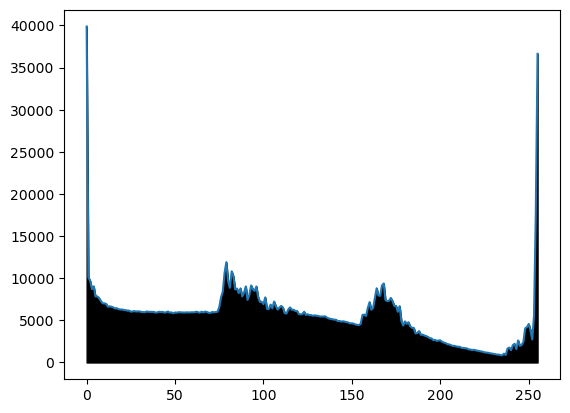

In [116]:
affiche_histogramme(image,'M')

In [123]:
def affiche_histogramme(image):
    X=[x for x in range(256)]
    H = histogramme(image)
    plt.subplot(2, 2, 1)
    Y = H[0]
    plt.plot(X,Y,color='red',label='R')
    plt.fill_between(X, Y, 0, color='red')
    plt.legend(loc="right")
    
    plt.subplot(2, 2, 2)
    Y = H[1]
    plt.plot(X,Y,color='green',label='G')
    plt.fill_between(X, Y, 0, color='green')
    plt.legend(loc="right")
    
    plt.subplot(2, 2, 3)
    Y = H[2]
    plt.plot(X,Y,color='blue',label='B')
    plt.fill_between(X, Y, 0, color='blue')
    plt.legend(loc="right")
    
    plt.subplot(2, 2, 4)
    Y = H[3]
    plt.plot(X,Y,color='black',label='Moy')
    plt.fill_between(X, Y, 0, color='black')
    plt.legend(loc="right")
    plt.tight_layout() 
    plt.show()

77 155 238
156


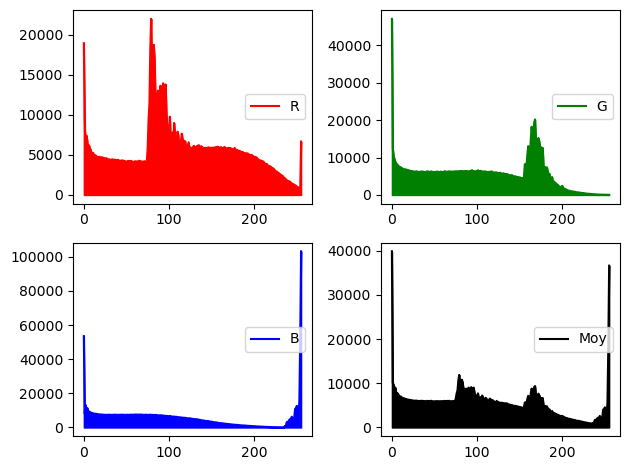

In [124]:
affiche_histogramme(image)